In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram
from datetime import datetime
import pywt

import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [38]:
df = pd.read_csv('crypto_data.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120061 entries, 0 to 1120060
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   date         1120061 non-null  object 
 1   symbol       1120061 non-null  object 
 2   open         1120061 non-null  float64
 3   high         1120061 non-null  float64
 4   low          1120061 non-null  float64
 5   close        1120061 non-null  float64
 6   volume usdt  1120061 non-null  int64  
 7   tradecount   1120061 non-null  int64  
 8   token        1120061 non-null  object 
 9   hour         1120061 non-null  int64  
 10  day          1120061 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 94.0+ MB


In [19]:
df.isna().sum()

date           0
symbol         0
open           0
high           0
low            0
close          0
volume usdt    0
tradecount     0
token          0
hour           0
day            0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
start = df.date.min()
end = df.date.max()

print(f'Data starts at {start} and ends at {end}')

Data starts at 2017-08-17 04:00:00 and ends at 2023-10-19 23:00:00


In [22]:
# df.set_index('date', inplace=True)

In [23]:
df.head()

,date,symbol,open,high,low,close,volume usdt,tradecount,token,hour,day
0,2020-12-25 05:00:00,1INCHUSDT,0.2000,3.0885,0.2000,2.5826,35530516,48768,1INCH,5,Friday
1,2020-12-25 06:00:00,1INCHUSDT,2.5824,2.6900,2.2249,2.5059,22440875,31099,1INCH,6,Friday
2,2020-12-25 07:00:00,1INCHUSDT,2.5152,2.8870,2.3609,2.6237,21300426,33001,1INCH,7,Friday
3,2020-12-25 08:00:00,1INCHUSDT,2.6318,2.8247,2.4650,2.6134,17491813,30459,1INCH,8,Friday
4,2020-12-25 09:00:00,1INCHUSDT,2.6104,2.7498,2.5629,2.6365,9919400,21023,1INCH,9,Friday


In [39]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [40]:
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['week'] = df['week'].astype(int)
df['year'] = df['date'].dt.year

In [41]:
df['lag_1'] = df['close'].shift(1)
df['lag_2'] = df['close'].shift(2)
# fill nan values with zero
df['lag_1'].fillna(0, inplace=True)
df['lag_2'].fillna(0, inplace=True)

In [42]:
# Calculate First and Second Derivatives
df['first_derivative'] = np.gradient(df['close'], axis=0)
df['second_derivative'] = np.gradient(df['first_derivative'], axis=0)


In [43]:
df['moving_avg'] = df['close'].rolling(window=20, min_periods=5).mean()

In [44]:

# Apply Continuous Wavelet Transform
def wavelet_transform(data, wavelet='fbsp1-1.5-1.0', scales=range(1, 128)):
    coefficients, frequencies = pywt.cwt(data, scales, wavelet)
    return coefficients, frequencies

# Example: Apply CWT to closing prices
#coefficients, frequencies = wavelet_transform(df['close'])

In [31]:
df.set_index('date', inplace=True)

In [ ]:
df.head()

,date,symbol,open,high,low,close,volume usdt,tradecount,token,hour,day,month,week,year,lag_1,lag_2,moving_avg,first_derivative,second_derivative
0,2020-12-25 05:00:00,1INCHUSDT,0.2000,3.0885,0.2000,2.5826,35530516,48768,1INCH,5,Friday,12,52,2020,0.0000,0.0000,NaN,-0.07670,0.097250
1,2020-12-25 06:00:00,1INCHUSDT,2.5824,2.6900,2.2249,2.5059,22440875,31099,1INCH,6,Friday,12,52,2020,2.5826,0.0000,NaN,0.02055,0.065225
2,2020-12-25 07:00:00,1INCHUSDT,2.5152,2.8870,2.3609,2.6237,21300426,33001,1INCH,7,Friday,12,52,2020,2.5059,2.5826,NaN,0.05375,-0.007075
3,2020-12-25 08:00:00,1INCHUSDT,2.6318,2.8247,2.4650,2.6134,17491813,30459,1INCH,8,Friday,12,52,2020,2.6237,2.5059,NaN,0.00640,0.011450
4,2020-12-25 09:00:00,1INCHUSDT,2.6104,2.7498,2.5629,2.6365,9919400,21023,1INCH,9,Friday,12,52,2020,2.6134,2.6237,2.59242,0.07665,-0.000425


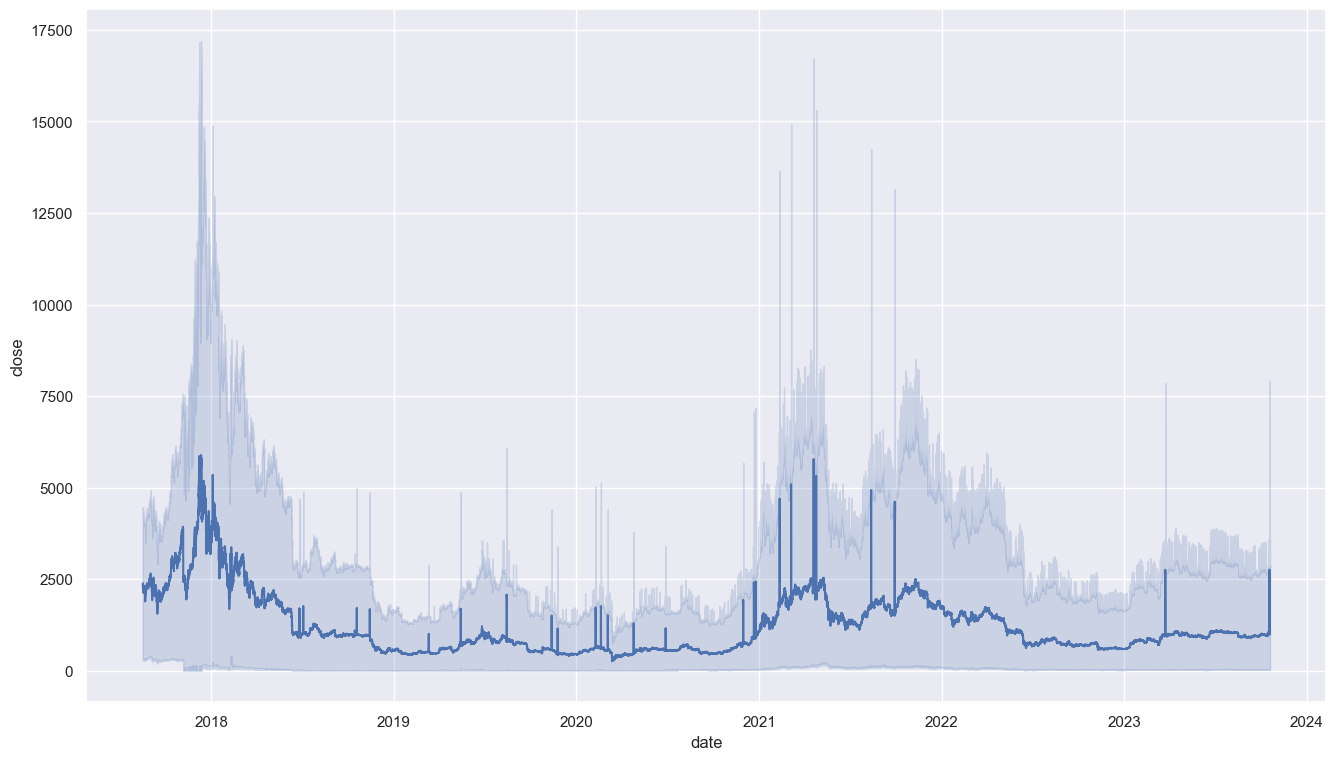

In [ ]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.lineplot(data=df, y='close', x ='date')
plt.show()

In [45]:
df_eth_2020 = df[(df['token'] == 'ETH') & (df['date'] > '2020-06-25 07:00:00')]

In [46]:
coefficients, frequencies = wavelet_transform(df_eth_2020['close'])

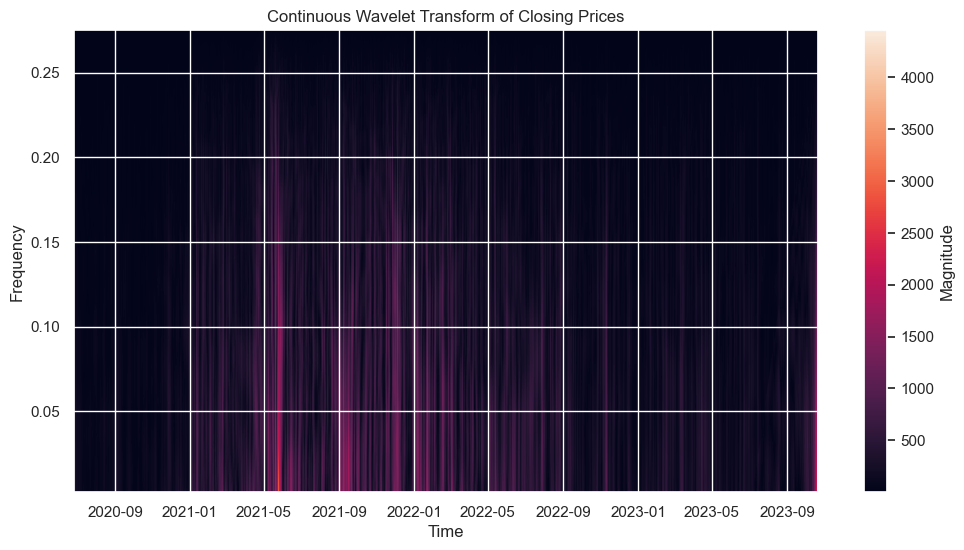

In [47]:

# Plot the CWT results
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[df_eth_2020['date'].min(), df_eth_2020['date'].max(), frequencies[-1], frequencies[0]])
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform of Closing Prices')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='date'>

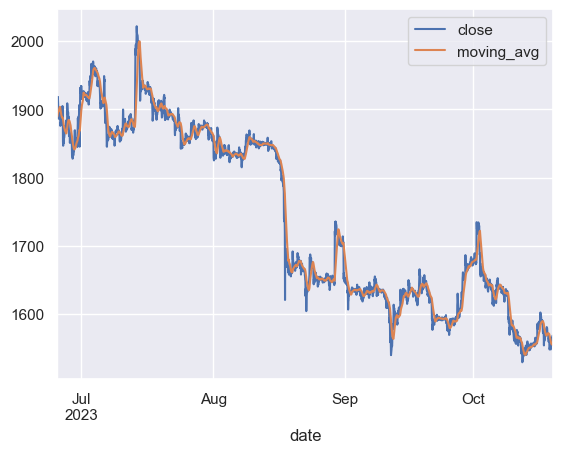

In [ ]:
df_eth_2020.plot(x='date', y=['close', 'moving_avg'])

In [ ]:
px.line(df_eth_2020, x='date', y='moving_avg')
px.line(df_eth_2020, x='date', y='close')